# 5. Valores medios mensuales en Vuelos Totales, Retrasados y Cancelados. 

## 5.1 Importación de librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pymongo import MongoClient

sns.set_style("darkgrid")

pd.options.display.float_format = '{:,.2f}'.format

## 5.2 Conexión con MONGO ATLAS / LOCAL

In [2]:
#Mongo Atlas
#URI ="mongodb://sato:<PASSWORD>@satoclusterfaa-shard-00-00-gst6h.\
#azure.mongodb.net:27017,satoclusterfaa-shard-00-01-gst6h.azure.\
#mongodb.net:27017,satoclusterfaa-shard-00-02-gst6h.azure.mongodb\
#.net:27017/test?ssl=true&replicaSet=SatoClusterFAA-shard-0&authSource=admin&retryWrites=true"

#client = MongoClient(URI)
#db = client.FAA_Airlines

#local
client = MongoClient()#"mongodb://localhost:27017")
db = client.airports

In [3]:
air = db.airlines

## 5.3 Valores medios mensuales

- **Query 7**

Con este consulta se pretende obtener la distribución media mensual de **Vuelos Totales, Vuelos Retrasados y Vuelos Cancelados** a los largo del período de estudio. Los pasos a seguir son los siguientes.

1. Se seleccionan los años que sean distintos a 2003 y 2016.
2. Se agrupa por mes y se calcula la media de los Vuelos Totales, Vuelos Retrasados y Vuelos Cancelados durante el período de estudio.

In [4]:
pipeline7 = [{"$match": {"time.year": {"$nin": [2003, 2016]}}},
             {"$group": {"_id": "$time.month", 
                        "Totales": {"$avg": "$statistics.flights.total"},
                        "Retrasados": {"$avg": "$statistics.flights.delayed"},
                        "Cancelados": {"$avg": "$statistics.flights.cancelled"}
                        }
             }    
            ]

curs7 = air.aggregate(pipeline7)

Con el cursor obtenido de la consulta, se crea un **DataFrame** con los resultados de la misma.

In [5]:
query7 = list(curs7)

In [6]:
df7 = pd.DataFrame(query7).set_index(['_id']).sort_index()
df7.T

_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Cancelados,27.89,29.49,18.27,12.94,12.54,17.65,17.36,15.82,12.69,12.50,9.30,23.40
Retrasados,200.64,188.14,205.56,179.87,190.06,238.31,238.58,208.50,146.03,174.56,156.42,239.66
Totales,947.53,883.00,"1,004.80",967.90,985.82,984.26,"1,030.23","1,018.28",934.88,985.68,930.91,958.14


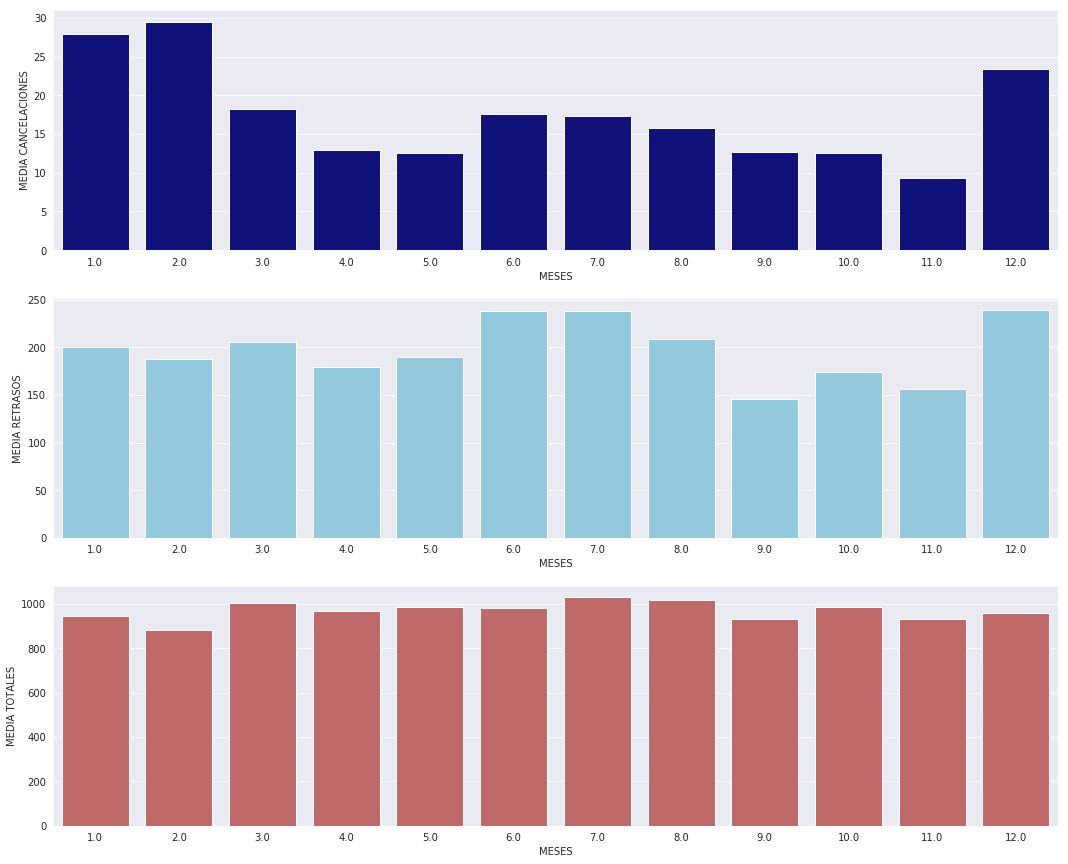

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18,15));

sns.barplot(x=df7.index, y= df7.iloc[:,0], color= "darkblue", ax=ax1);
ax1.set_ylabel("MEDIA CANCELACIONES");
ax1.set_xlabel("MESES");

sns.barplot(x=df7.index, y= df7.iloc[:,1], color= 'SkyBlue', ax=ax2);
ax2.set_ylabel("MEDIA RETRASOS");
ax2.set_xlabel("MESES");

sns.barplot(x=df7.index, y= df7.iloc[:,2], color= 'IndianRed', ax=ax3);
ax3.set_ylabel("MEDIA TOTALES");
ax3.set_xlabel("MESES");

## 2.3. Gráficos Distribución mes-año de Ratios de Vuelos Puntuales, Retrasados y Cancelados respecto a Totales. 

Finalmente, se crean los gráficos correspondientes a las **distribuciones mes-año de los Ratios de Vuelos Puntuales, Retrasados y Cancelados respecto a Totales**. 

- **Query 8**

In [8]:
pipeline8 = [{"$match": {"time.year": {"$nin": [2003, 2016]}}},
             {"$group": {"_id": {"year": "$time.year", "month": "$time.month"},
                         "Totales": {"$sum": "$statistics.flights.total"},
                         "Retrasados": {"$sum": "$statistics.flights.delayed"},
                         "Cancelados": {"$sum": "$statistics.flights.cancelled"},
                         "Puntuales": {"$sum": "$statistics.flights.on time"}
                        }
             },
             {"$project": {
                          "year": "$_id.year",
                          "month": "$_id.month",
                          "Ratio_Retrasados": {"$divide": ["$Retrasados", "$Totales"]},
                          "Ratio_Cancelados": {"$divide": ["$Cancelados", "$Totales"]},
                          "Ratio_Puntuales": {"$divide": ["$Puntuales", "$Totales"]},
                          "_id": 0
                          }
             }
            ]

curs8 = air.aggregate(pipeline8)

In [9]:
query8 = list(curs8)

In [10]:
df8 = pd.DataFrame(query8).set_index(["year", "month"]).unstack()
df8.index.name = "year"
df8.head(10)

Ratio_Cancelados                                                  \
month               1.00  2.00  3.00  4.00  5.00  6.00  7.00  8.00  9.00    
year                                                                        
2,004.00             0.03  0.02  0.01  0.01  0.02  0.01  0.02  0.02  0.03   
2,005.00             0.04  0.02  0.02  0.01  0.01  0.02  0.02  0.02  0.02   
2,006.00             0.02  0.02  0.01  0.01  0.01  0.02  0.02  0.02  0.02   
2,007.00             0.02  0.05  0.03  0.02  0.01  0.03  0.02  0.02  0.01   
2,008.00             0.03  0.04  0.03  0.02  0.01  0.02  0.02  0.02  0.02   
2,009.00             0.02  0.01  0.02  0.02  0.01  0.02  0.01  0.01  0.01   
2,010.00             0.02  0.06  0.02  0.01  0.01  0.02  0.01  0.01  0.01   
2,011.00             0.04  0.05  0.01  0.02  0.02  0.02  0.02  0.03  0.01   
2,012.00             0.02  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01   
2,013.00             0.01  0.02  0.02  0.02  0.01  0.02  0.02  0.01  0.01   

                ...  Ratio_Retrasados                                      \
month    10.00  ...             3.00  4.00  5.00  6.00  7.00  8.00  9.00    
year            ...                                                         
2,004.00  0.01  ...              0.18  0.16  0.21  0.25  0.22  0.20  0.13   
2,005.00  0.02  ...              0.22  0.15  0.16  0.24  0.27  0.23  0.16   
2,006.00  0.02  ...              0.23  0.21  0.21  0.25  0.24  0.22  0.23   
2,007.00  0.01  ...              0.25  0.23  0.22  0.29  0.28  0.27  0.17   
2,008.00  0.01  ...              0.26  0.21  0.21  0.28  0.23  0.20  0.14   
2,009.00  0.01  ...              0.20  0.20  0.19  0.23  0.21  0.20  0.13   
2,010.00  0.01  ...              0.19  0.14  0.19  0.22  0.21  0.17  0.14   
2,011.00  0.01  ...              0.19  0.22  0.21  0.21  0.20  0.18  0.15   
2,012.00  0.03  ...              0.17  0.12  0.16  0.18  0.22  0.19  0.16   
2,013.00  0.01  ...              0.18  0.21  0.19  0.26  0.25  0.20  0.15   

                            
month    10.00 11.00 12.00  
year                        
2,004.00  0.18  0.20  0.26  
2,005.00  0.18  0.19  0.27  
2,006.00  0.26  0.22  0.26  
2,007.00  0.21  0.20  0.33  
2,008.00  0.14  0.16  0.31  
2,009.00  0.22  0.11  0.25  
2,010.00  0.15  0.16  0.23  
2,011.00  0.14  0.14  0.15  
2,012.00  0.17  0.13  0.21  
2,013.00  0.15  0.15  0.27  

[10 rows x 36 columns]

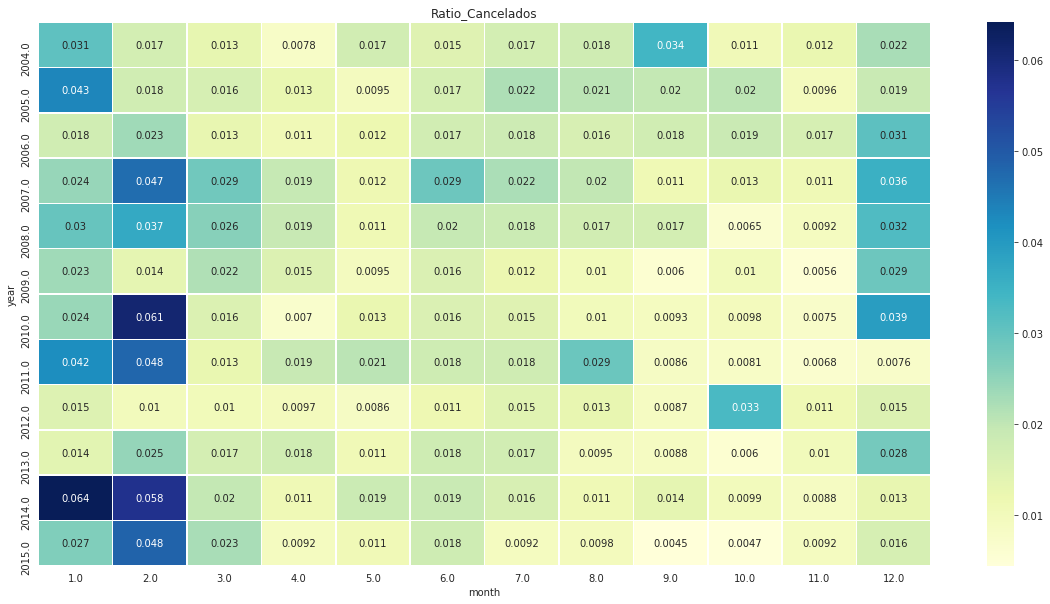

In [11]:
fig1, ax1 = plt.subplots(1, 1, figsize=(20, 10));

ax1 = sns.heatmap(df8["Ratio_Cancelados"], annot=True, linewidths=.5, cmap="YlGnBu");
ax1.set_title("Ratio_Cancelados");

De este gráfico se desprende que:

- los **meses donde peores ratios de cancelaciones se han registrado históricamente han sido enero, febrero y diciembre**.

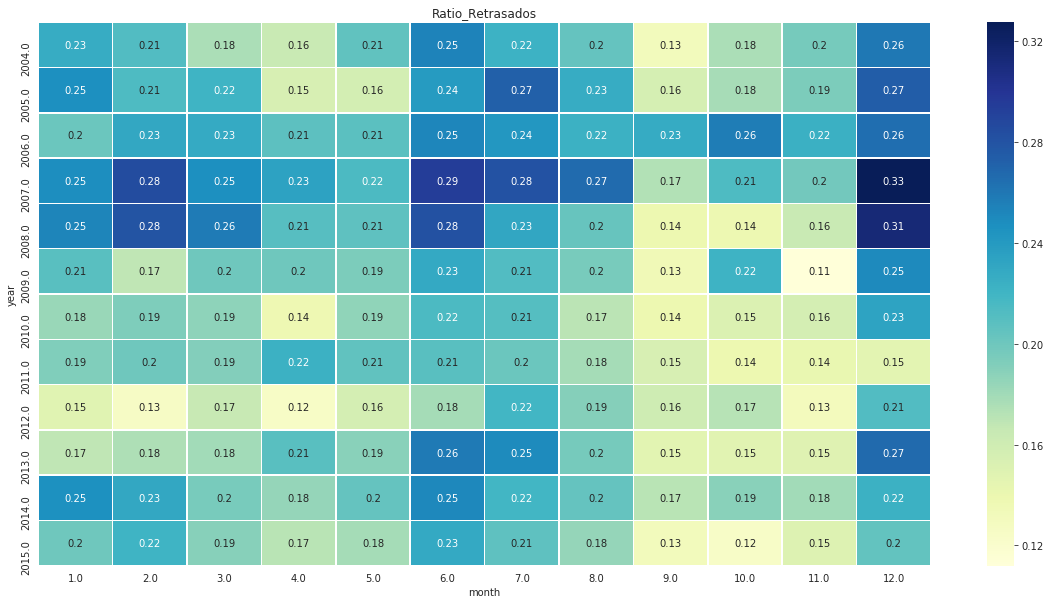

In [12]:
fig2, ax2 = plt.subplots(1, 1, figsize=(20, 10));

ax2 = sns.heatmap(df8["Ratio_Retrasados"], annot=True, linewidths=.5, cmap="YlGnBu");
ax2.set_title("Ratio_Retrasados");

De este gráfico se desprende que:

- los **meses donde mejores ratios de retraso se han registrado históricamente han sido septiembre, octubre y noviembre**.

- los **meses donde peores ratios de retraso se han registrado históricamente han sido junio, julio y agosto**.

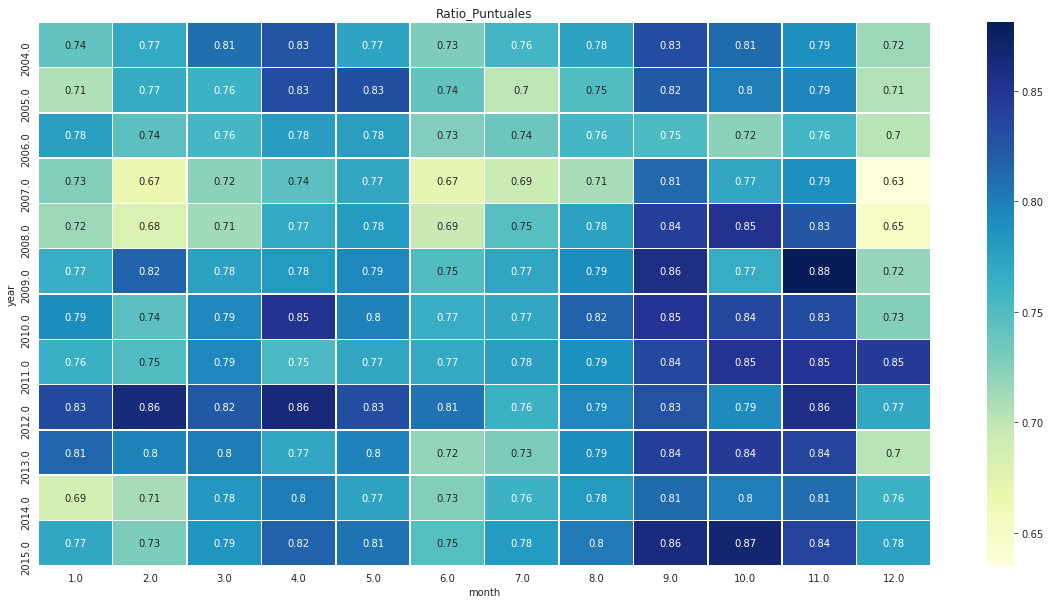

In [13]:
df_Puntuales = df8.unstack()["Ratio_Puntuales"]

fig3, ax3 = plt.subplots(1, 1, figsize=(20, 10));

ax3 = sns.heatmap(df8["Ratio_Puntuales"], annot=True, linewidths=.5, cmap="YlGnBu");
ax3.set_title("Ratio_Puntuales");

De este último gráfico se desprende que:

- los **meses donde mejores ratios de puntualidad se registran históricamente han sido septiembre, octubre y noviembre**.